In [77]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
import seaborn as sns
sns.set(font_scale=1.9)  # Make sure everything is readable.
sns.set_style("whitegrid")
figsize=(6,4)

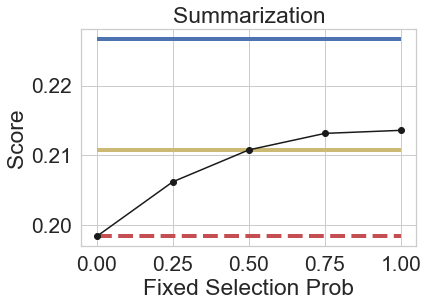

In [2]:

x = np.array([0, 0.25, 0.5, 0.75, 1.0])

y_items = [
    {'n_sample': 3, 'scheme': 'sample', 'PLM_temperature': 1.0, 'Calib_temperature': 1.0, 'topk': 0, 'scoring': 'sample', 'bleu': 0.4275447209919516, 'rl': 0.5092864889826517, 'fixed_inj_prob': 0},
    {'n_sample': 3, 'scheme': 'cat', 'PLM_temperature': 1.0, 'Calib_temperature': 1.0, 'topk': 0, 'scoring': 'sample', 'bleu': 0.42739776941141483, 'rl': 0.510855407831042, 'fixed_inj_prob': 0.25},
    {'n_sample': 3, 'scheme': 'cat', 'PLM_temperature': 1.0, 'Calib_temperature': 1.0, 'topk': 0, 'scoring': 'sample', 'bleu': 0.4285176583760918, 'rl': 0.5109592596450719, 'fixed_inj_prob': 0.5},
    {'n_sample': 3, 'scheme': 'cat', 'PLM_temperature': 1.0, 'Calib_temperature': 1.0, 'topk': 0, 'scoring': 'sample', 'bleu': 0.4266890202512285, 'rl': 0.5063686623001511, 'fixed_inj_prob': 0.75},
    {'n_sample': 3, 'scheme': 'cat', 'PLM_temperature': 1.0, 'Calib_temperature': 1.0, 'topk': 0, 'scoring': 'sample', 'bleu': 0.42574316530743467, 'rl': 0.5032150127454674, 'fixed_inj_prob': 1.0}
]
y = []
for item in y_items:
    y.append((item['bleu'] + item['rl'])/2)
STG = (0.4752)
title = 'QA'
ylabel = 'Score'


y_items = [
    {'BLEU': 29.00/100, 'ERR': 9.15, 'FIP': 0},
    {'BLEU': 29.28/100, 'ERR': 9.80, 'FIP': 0.25},
    {'BLEU': 29.72/100, 'ERR': 9.52, 'FIP': 0.5},
    {'BLEU': 29.70/100, 'ERR': 9.85, 'FIP': 0.75},
    {'BLEU': 30.12/100, 'ERR': 10.33, 'FIP': 1}
]
y = []
for item in y_items:
    y.append(item['BLEU'])
STG = (0.3024)
# STG = (9.03)
title = 'Data2Text (TV)'
ylabel = 'BLEU'

y_items = [
    {'r1': 0.2899, 'r2': 0.1052, 'rl': 0.1984, 'fixed_inj_prob': 0.25},
    {'r1': 0.3018056682066645, 'r2': 0.10940597090124438, 'rl': 0.2062176316618338, 'fixed_inj_prob': 0.25},
    {'r1': 0.30870535933609683, 'r2': 0.11185030534676446, 'rl': 0.2107868347653069, 'fixed_inj_prob': 0.5},
    {'r1': 0.3134244795010708, 'r2': 0.1136962824452873, 'rl': 0.21315109904488969, 'fixed_inj_prob': 0.75},
    {'r1': 0.315223258631002, 'r2': 0.1140670546558028, 'rl': 0.21358698780869237, 'fixed_inj_prob': 1.0}
]
y = []
for item in y_items:
    y.append(item['rl'])

STGs = [0.3225, 0.1217, 0.2267]
STG = STGs[2]
title = 'Summarization'
ylabel = 'Score'

PLM = (y[0])
y = np.array(y)
random_baseline = y[2]

min_y = min(y)

fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)

ax.hlines(STG, min(x), max(x), colors='b', linestyles='solid', label='STG', lw=4)
ax.plot(x, y, 'k', alpha=1.0, label='Fixed', marker='o')
ax.hlines(random_baseline, min(x), max(x), colors='y', linestyles='solid', label='random', lw=4)
ax.hlines(PLM, min(x), max(x), colors='r', linestyles='dashed', label='PLM', lw=4)
ax.set_title(title)
ax.set_xlabel('Fixed Selection Prob')
ax.set_ylabel(ylabel)

# plt.legend(loc='upper left', markerfirst=False, frameon=False, fontsize='x-small')
plt.show()

In [231]:
QA_N_DATA = [50, 100, 500, 1000, 2000]
LEGEND = ['PLM', 'Non-STG-MLE', 'Non-STG-RL', 'NE(max)-MLE', 'NE(mix)-MLE', 'NE(max)-RL', 'NE(mix)-RL', 'STG']
LINES = ['--', '-', '-', '-', '-', '-', '-', '-']
MARKERS = [None, 'o', 'o', '*', '*', '^', '^', 'o']
colors = ['black', 'tab:orange', 'tab:green', 'tab:purple', 'tab:pink', 'tab:green', 'tab:olive','tab:blue']
QA_BLEU_GAIN = [
    [0, 0, 0, 0, 0],
    [6.77, -0.85, -1.12, -0.47, 0.13],
    [0.08, 0.15, -0.56, -0.24, 0.28],
    [7.22, 0.17, -0.95, -0.38, -0.07],
    [6.98, 0.38, 0.62, 0.77, 0.72],
    [0.06, 0.07, -0.51, 0.02, -0.14],
    [0.7, 0.18, 0.29, 0.80, 0.56],
    [13.34, 1.37, 1.72, 1.27, 0.70]
]
QA_BLEU_STD = [
    [0, 0, 0, 0, 0],
    [2.83, -0.84, 0.81, 0.41, 0.02],
    [0.69, 0.32, 0.24, 0.34, 0.33],
    [3.17, 1.3, 0.88, 0.51, 0.07],
    [0.88, 0.54, 0.58, 0.37, 0.22],
    [1.03, 0.12, 0.31, 0.47, 0.57],
    [0.57, 0.31, 0.20, 0.24, 0.08],
    [3.12, 1.17, 0.34, 0.38, 0.22]
]
QA_RL_GAIN = [
    [0, 0, 0, 0, 0],
    [6.07, -0.34, -0.03, 0.37, 0.79],
    [-0.07, 0.01, -0.32, 0.20, 0.82],
    [5.94, 0.6, 0.83, 1.01, 1.20],
    [6.08, 0.55, 1.32, 1.38, 1.28],
    [-0.12, -0.11, -0.16, 0.78, 1.05],
    [0.61, 0.06, 0.42, 1.08, 1.00],
    [10.58, 1.97, 1.43, 1.43, 1.28]
]
QA_RL_STD = [
    [0, 0, 0, 0, 0],
    [2.64, 0.72, 0.69, 0.40, 0.21],
    [0.56, 0.12, 0.14, 0.21, 0.31],
    [2.58, 1.16, 0.88, 0.57, 0.35],
    [0.31, 0.7, 0.64, 0.40, 0.25],
    [0.85, 0.16, 0.18, 0.38, 0.57],
    [0.42, 0.13, 0.29, 0.19, 0.01],
    [2.58, 1.63, 0.61, 0.37, 0.38]
]


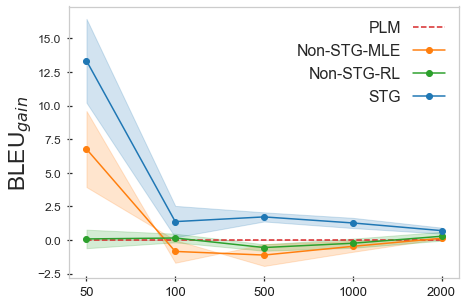

In [237]:
figsize = (7, 5)
fig = plt.figure(figsize=figsize)

for i in range(len(LEGEND)):
    if LEGEND[i].startswith('NE'):
        continue
    x = np.arange(len(QA_N_DATA))
    mean = np.array(QA_BLEU_GAIN[i])
    std = np.array(QA_BLEU_STD[i])
    plt.plot(x, mean, color=colors[i], label=LEGEND[i], linestyle=LINES[i], marker=MARKERS[i])
    plt.fill_between(x, mean-std, mean+std, alpha=.2, color=colors[i])

plt.xticks(x, labels=QA_N_DATA)
plt.legend(loc='upper right', markerfirst=False, frameon=False, fontsize='x-small')
# plt.xlabel('number of shot')
plt.ylabel('BLEU' + r'$_{gain}$')
plt.tick_params(axis='x', direction='inout', length=5, pad=5, labelsize=13, labelcolor='k', bottom=True)
plt.tick_params(axis='y', direction='inout', length=5, pad=5, labelsize=12, left=True)
plt.grid(False)
plt.show()

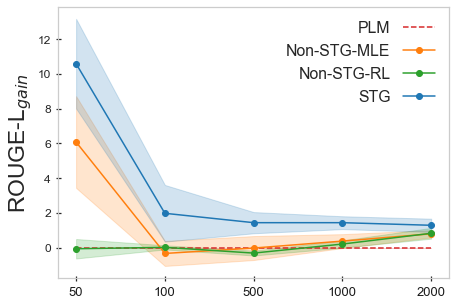

In [238]:
figsize = (7, 5)
fig = plt.figure(figsize=figsize)

for i in range(len(LEGEND)):
    if LEGEND[i].startswith('NE'):
        continue
    x = np.arange(len(QA_N_DATA))
    mean = np.array(QA_RL_GAIN[i])
    std = np.array(QA_RL_STD[i])
    plt.plot(x, mean, color=colors[i], label=LEGEND[i], linestyle=LINES[i], marker=MARKERS[i])
    plt.fill_between(x, mean-std, mean+std, alpha=.2, color=colors[i])

plt.xticks(x, labels=QA_N_DATA)
plt.legend(loc='upper right', markerfirst=False, frameon=False, fontsize='x-small')
# plt.xlabel('number of shot')
plt.ylabel('ROUGE-L' + r'$_{gain}$')
plt.tick_params(axis='x', direction='inout', length=5, pad=5, labelsize=13, labelcolor='k', bottom=True)
plt.tick_params(axis='y', direction='inout', length=5, pad=5, labelsize=12, left=True)
plt.grid(False)
plt.show()

In [241]:
SUMM_N_DATA = [50, 100, 300, 1500, 3000]
LEGEND = ['PLM', 'Non-STG-MLE', 'Non-STG-RL', 'STG']
LINES = ['--', '-', '-', '-', '-', '-', '-', '-']
MARKERS = [None, 'o', 'o', '*', '*', '^', '^', 'o']
COLORS = ['tab:red', 'tab:orange', 'tab:green', 'tab:blue']
SUMM_R1_GAIN_MEAN = [
    [0, 0, 0, 0, 0],
    [0.72, 0.51, -0.49, 0.14, 0.22],
    [0.55, -0.02, 0.23, 0.15, 0.21],
    [2.72, 1.38, 3.88, 0.28, 1.00],    
]
SUMM_R1_GAIN_STD = [
    [0, 0, 0, 0, 0],
    [2.36, 0.38, 1.56, 0.13, 0.03],
    [1.49, 0.34, 1.36, 0.15, 0.13],
    [0.9, 0.91, 3.15, 0.15, 0.48],    
]
SUMM_R2_GAIN_MEAN = [
    [0, 0, 0, 0, 0],
    [0.24, 0.13, -0.21, 0.05, 0.07],
    [0.2, -0.03, 0.03, 0.07, 0.08],
    [0.77, 0.45, 1.24, 0.09, 0.40],    
]
SUMM_R2_GAIN_STD = [
    [0, 0, 0, 0, 0],
    [0.75, 0.12, 0.55, 0.07, 0.02],
    [0.48, 0.12, 0.5, 0.07, 0.05],
    [0.32, 0.34, 1.15, 0.05, 0.15],    
]
SUMM_RL_GAIN_MEAN = [
    [0, 0, 0, 0, 0],
    [0.4, 0.26, -0.37, -0.01, 0.10],
    [0.38, -0.05, 0.1, 0.02, 0.13],
    [1.73, 0.89, 2.55, 0.15, 0.61],    
]
SUMM_RL_GAIN_STD = [
    [0, 0, 0, 0, 0],
    [1.49, 0.27, 1.06, 0.06, 0.07],
    [0.96, 0.19, 0.93, 0.08, 0.12],
    [0.69, 0.64, 2.15, 0.09, 0.33],    
]

In [242]:
def plot_summ_gain(ylabel, n_data, legends, means, stds, colors, lines, markers):
    figsize = (7, 5)
    fig = plt.figure(figsize=figsize)

    for i in range(len(legends)):
        x = np.arange(len(n_data))
        mean = np.array(means[i])
        std = np.array(stds[i])
        plt.plot(x, mean, color=colors[i], label=legends[i], linestyle=lines[i], marker=markers[i])
        plt.fill_between(x, mean-std, mean+std, alpha=.2, color=colors[i])

    plt.xticks(x, labels=n_data)
    plt.legend(loc='upper right', markerfirst=False, frameon=False, fontsize='x-small')
#     plt.xlabel('number of shot')
    plt.ylabel(ylabel)
    plt.tick_params(axis='x', direction='inout', length=5, pad=5, labelsize=13, labelcolor='k', bottom=True)
    plt.tick_params(axis='y', direction='inout', length=5, pad=5, labelsize=12, left=True)
    plt.grid(False)
    plt.show()

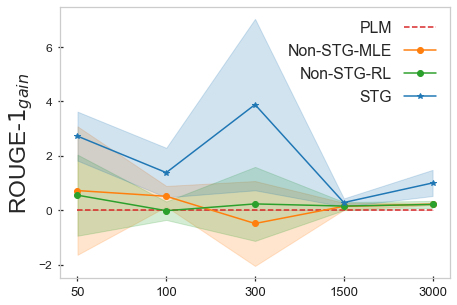

In [243]:
plot_summ_gain('ROUGE-' + r'$1_{gain}$', 
               SUMM_N_DATA, LEGEND, SUMM_R1_GAIN_MEAN, SUMM_R1_GAIN_STD, COLORS, LINES, MARKERS)

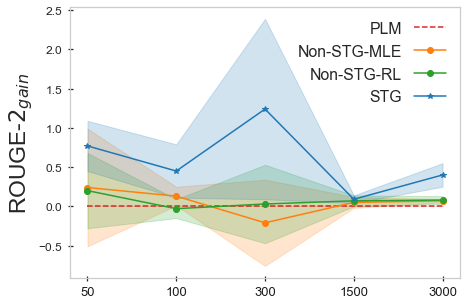

In [244]:
plot_summ_gain('ROUGE-' + r'$2_{gain}$', 
               SUMM_N_DATA, LEGEND, SUMM_R2_GAIN_MEAN, SUMM_R2_GAIN_STD, COLORS, LINES, MARKERS)

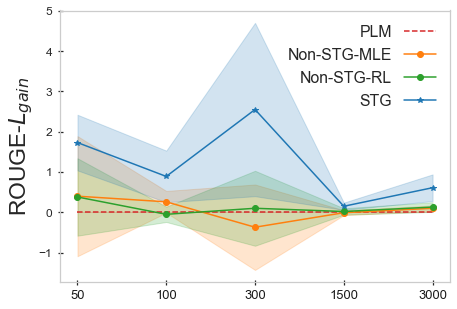

In [245]:
plot_summ_gain('ROUGE-' + r'$L_{gain}$', 
               SUMM_N_DATA, LEGEND, SUMM_RL_GAIN_MEAN, SUMM_RL_GAIN_STD, COLORS, LINES, MARKERS)